In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
# fix random seed for reproducibility
tf.random.set_seed(7)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving BograFlood.csv to BograFlood.csv


In [3]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['BograFlood.csv']))

In [4]:
df.drop(columns='Station_Names',inplace=True)
df.drop(columns='Station_Number',inplace=True)
df.drop(columns='X_COR',inplace=True)
df.drop(columns='Y_COR',inplace=True)
df.drop(columns='LATITUDE',inplace=True)
df.drop(columns='LONGITUDE',inplace=True)
df.drop(columns='ALT',inplace=True)
df['Flood?'] = df['Flood?'].fillna(0)

In [5]:
df.head(5)

,Sl,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Period,Flood?
0,1356,1948,1,25.8,11.7,8.140625,74.218750,0.875926,1.1,7.296226,1948.01,0.0
1,1357,1948,2,33.3,13.3,11.140625,66.531250,1.022222,1.9,8.267925,1948.02,0.0
2,1358,1948,3,38.3,17.4,25.312500,61.812500,1.340741,2.1,8.573585,1948.03,0.0
3,1359,1948,4,39.5,22.7,69.140625,66.203125,1.740741,3.7,8.009434,1948.04,0.0
4,1360,1948,5,36.1,23.1,179.890625,76.859375,1.781481,4.3,7.303774,1948.05,0.0


In [9]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import keras

In [12]:
properties = list(df.columns.values)
properties.remove('Flood?')
properties.remove('Sl')
print(properties)
X = df[properties]
y = df['Flood?']

['Year', 'Month', 'Max_Temp', 'Min_Temp', 'Rainfall', 'Relative_Humidity', 'Wind_Speed', 'Cloud_Coverage', 'Bright_Sunshine', 'Period']


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(10,)),
    keras.layers.Dense(20, activation=tf.nn.relu),
	  keras.layers.Dense(20, activation=tf.nn.relu),
    keras.layers.Dense(1, activation=tf.nn.sigmoid),
])

In [19]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/100
56/56 [==============================] - 1s 6ms/step - loss: 0.0752 - accuracy: 0.9747 - val_loss: 0.0509 - val_accuracy: 0.9706
Epoch 2/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0759 - accuracy: 0.9711 - val_loss: 0.0477 - val_accuracy: 0.9790
Epoch 3/100
56/56 [==============================] - 0s 4ms/step - loss: 0.1102 - accuracy: 0.9693 - val_loss: 0.0784 - val_accuracy: 0.9580
Epoch 4/100
56/56 [==============================] - 0s 3ms/step - loss: 0.1154 - accuracy: 0.9675 - val_loss: 0.0537 - val_accuracy: 0.9664
Epoch 5/100
56/56 [==============================] - 0s 4ms/step - loss: 0.0855 - accuracy: 0.9675 - val_loss: 0.0553 - val_accuracy: 0.9748
Epoch 6/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0686 - accuracy: 0.9783 - val_loss: 0.0501 - val_accuracy: 0.9790
Epoch 7/100
56/56 [==============================] - 0s 3ms/step - loss: 0.0670 - accuracy: 0.9801 - val_loss: 0.0498 - val_accuracy: 0.9790
Epoch 8/100
5

[]

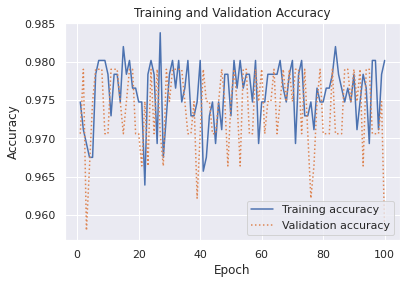

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

Text(89.18, 0.5, 'Actual label')

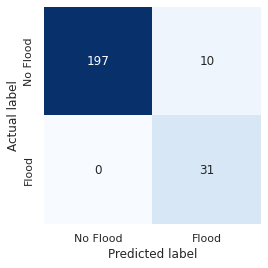

In [21]:
from sklearn.metrics import confusion_matrix
 
y_predicted = model.predict(X_test) > 0.5
mat = confusion_matrix(y_test, y_predicted)
labels = ['No Flood', 'Flood']
 
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap='Blues',
            xticklabels=labels, yticklabels=labels)
 
plt.xlabel('Predicted label')
plt.ylabel('Actual label')

In [22]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report

In [23]:
print(classification_report(y_test, y_predicted, target_names=labels))

              precision    recall  f1-score   support

    No Flood       1.00      0.95      0.98       207
       Flood       0.76      1.00      0.86        31

    accuracy                           0.96       238
   macro avg       0.88      0.98      0.92       238
weighted avg       0.97      0.96      0.96       238

